# Part Three: Forecasting

### Create your Portfolio and Index Dataframes

In [1]:
#Import all of the necessary libraries

import os
import pandas as pd
import alpaca_trade_api as tradeapi
import numpy as np
from MCForecastTools import MCSimulation


%matplotlib inline

In [2]:
#Read your data into a dataframe
final_portfolio = pd.read_csv('../../data/cleandata/Final_Portfolio.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)

final_portfolio.head(10)

,SP500,Nasdaq,BA,DAL,MGM,WYNN,Tesla,Gamestop,AAPL,AMZN,BRK.A,MSFT,BTC,ETH
Date,,,,,,,,,,,,,,
2020-03-17,252.800003,7334.779785,124.03,31.740,9.540,54.34,430.000,4.2300,252.850,1807.380,280619.12,146.57,5225.629395,113.942749
2020-03-18,240.000000,6989.839844,101.89,23.485,7.140,43.02,361.600,3.7800,249.000,1832.390,258927.00,142.13,5238.438477,114.842270
2020-03-19,240.509995,7150.580078,97.71,21.500,7.700,46.57,427.295,4.1900,244.780,1880.500,261690.00,142.67,6191.192871,136.593857
2020-03-20,228.800003,6879.520020,95.01,21.350,9.110,51.97,427.530,3.7550,228.740,1846.090,254600.00,136.77,6198.778320,132.737167
2020-03-23,222.949997,6860.669922,105.49,22.230,9.150,57.56,434.290,3.8100,223.430,1902.540,242000.00,135.56,6416.314941,134.911606
2020-03-24,243.149994,7417.859863,127.50,26.890,12.185,66.54,504.300,4.1950,246.880,1940.000,267090.00,148.34,6734.803711,138.761444
2020-03-25,246.789993,7384.299805,158.68,31.140,12.945,75.06,539.175,4.2000,245.465,1885.780,269409.75,146.85,6681.062988,136.195892
2020-03-26,261.200012,7797.540039,180.40,31.700,13.410,71.40,528.050,4.4050,258.480,1955.225,276095.00,156.11,6716.440430,138.361557
2020-03-27,253.419998,7502.379883,161.99,29.550,12.180,63.31,514.560,4.2101,247.620,1899.920,269350.00,149.61,6469.798340,133.937943


In [3]:
#Separate the index funds into a separate dataframe from your portfolio
index_portfolio = final_portfolio[['SP500', 'Nasdaq']]

index_portfolio.head(10)

,SP500,Nasdaq
Date,,
2020-03-17,252.800003,7334.779785
2020-03-18,240.000000,6989.839844
2020-03-19,240.509995,7150.580078
2020-03-20,228.800003,6879.520020
2020-03-23,222.949997,6860.669922
2020-03-24,243.149994,7417.859863
2020-03-25,246.789993,7384.299805
2020-03-26,261.200012,7797.540039
2020-03-27,253.419998,7502.379883


In [4]:
#Add a second header to the index dataframe
index_portfolio.columns = pd.MultiIndex.from_tuples(
    zip(index_portfolio.columns, ['close','close']
        ))

index_portfolio.head()

,SP500,Nasdaq
,close,close
Date,,
2020-03-17,252.800003,7334.779785
2020-03-18,240.000000,6989.839844
2020-03-19,240.509995,7150.580078
2020-03-20,228.800003,6879.520020
2020-03-23,222.949997,6860.669922


In [5]:
#Separate your portfolio into a separate dataframe from the index funds
investment_portfolio = final_portfolio[['BA', 'DAL', 'MGM', 'WYNN', 'Tesla', 'Gamestop', 'AAPL', 'AMZN', 'BRK.A', 'MSFT', 'BTC', 'ETH']]

investment_portfolio.head(10)

,BA,DAL,MGM,WYNN,Tesla,Gamestop,AAPL,AMZN,BRK.A,MSFT,BTC,ETH
Date,,,,,,,,,,,,
2020-03-17,124.03,31.740,9.540,54.34,430.000,4.2300,252.850,1807.380,280619.12,146.57,5225.629395,113.942749
2020-03-18,101.89,23.485,7.140,43.02,361.600,3.7800,249.000,1832.390,258927.00,142.13,5238.438477,114.842270
2020-03-19,97.71,21.500,7.700,46.57,427.295,4.1900,244.780,1880.500,261690.00,142.67,6191.192871,136.593857
2020-03-20,95.01,21.350,9.110,51.97,427.530,3.7550,228.740,1846.090,254600.00,136.77,6198.778320,132.737167
2020-03-23,105.49,22.230,9.150,57.56,434.290,3.8100,223.430,1902.540,242000.00,135.56,6416.314941,134.911606
2020-03-24,127.50,26.890,12.185,66.54,504.300,4.1950,246.880,1940.000,267090.00,148.34,6734.803711,138.761444
2020-03-25,158.68,31.140,12.945,75.06,539.175,4.2000,245.465,1885.780,269409.75,146.85,6681.062988,136.195892
2020-03-26,180.40,31.700,13.410,71.40,528.050,4.4050,258.480,1955.225,276095.00,156.11,6716.440430,138.361557
2020-03-27,161.99,29.550,12.180,63.31,514.560,4.2101,247.620,1899.920,269350.00,149.61,6469.798340,133.937943


In [6]:
#Add a second header to your portfolio dataframe
investment_portfolio.columns = pd.MultiIndex.from_tuples(
    zip(investment_portfolio.columns, ['close','close', 'close','close', 'close','close', 'close','close', 'close','close', 'close','close']
        ))

investment_portfolio.head()

,BA,DAL,MGM,WYNN,Tesla,Gamestop,AAPL,AMZN,BRK.A,MSFT,BTC,ETH
,close,close,close,close,close,close,close,close,close,close,close,close
Date,,,,,,,,,,,,
2020-03-17,124.03,31.740,9.54,54.34,430.000,4.230,252.85,1807.38,280619.12,146.57,5225.629395,113.942749
2020-03-18,101.89,23.485,7.14,43.02,361.600,3.780,249.00,1832.39,258927.00,142.13,5238.438477,114.842270
2020-03-19,97.71,21.500,7.70,46.57,427.295,4.190,244.78,1880.50,261690.00,142.67,6191.192871,136.593857
2020-03-20,95.01,21.350,9.11,51.97,427.530,3.755,228.74,1846.09,254600.00,136.77,6198.778320,132.737167
2020-03-23,105.49,22.230,9.15,57.56,434.290,3.810,223.43,1902.54,242000.00,135.56,6416.314941,134.911606


### Simulate one year portfolio growth with original portfolio-distributed stock investments

In [7]:
# Configure a Monte Carlo simulation to forecast one year of cumulative returns for your portfolio
MC_even_dist = MCSimulation(
    portfolio_data = investment_portfolio,
    weights = [.0625, .0625, .0625, .0625, .0625, .0625, .125, .125, .125, .125, .0625, .0625],
    num_simulation = 1000,
    num_trading_days = 252*1
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

BA                  DAL                MGM               \
             close daily_return   close daily_return close daily_return   
Date                                                                      
2020-03-17  124.03          NaN  31.740          NaN  9.54          NaN   
2020-03-18  101.89    -0.178505  23.485    -0.260082  7.14    -0.251572   
2020-03-19   97.71    -0.041025  21.500    -0.084522  7.70     0.078431   
2020-03-20   95.01    -0.027633  21.350    -0.006977  9.11     0.183117   
2020-03-23  105.49     0.110304  22.230     0.041218  9.15     0.004391   

             WYNN                 Tesla               ...     AMZN  \
            close daily_return    close daily_return  ...    close   
Date                                                  ...            
2020-03-17  54.34          NaN  430.000          NaN  ...  1807.38   
2020-03-18  43.02    -0.208318  361.600    -0.159070  ...  1832.39   
2020-03-19  46.57     0.082520  427.295     0.181679  ...  1880.50   
2020-03-20  51.97     0.115954  427.530     0.000550  ...  1846.09   
2020-03-23  57.56     0.107562  434.290     0.015812  ...  1902.54   

                             BRK.A                 MSFT               \
           daily_return      close daily_return   close daily_return   
Date                                                                   
2020-03-17          NaN  280619.12          NaN  146.57          NaN   
2020-03-18     0.013838  258927.00    -0.077301  142.13    -0.030293   
2020-03-19     0.026255  261690.00     0.010671  142.67     0.003799   
2020-03-20    -0.018298  254600.00    -0.027093  136.77    -0.041354   
2020-03-23     0.030578  242000.00    -0.049489  135.56    -0.008847   

                    BTC                      ETH               
                  close daily_return       close daily_return  
Date                                                           
2020-03-17  5225.629395          NaN  113.942749          NaN  
2020-03-18  5238.438477     0.002451  114.842270     0.007894  
2020-03-19  6191.192871     0.181878  136.593857     0.189404  
2020-03-20  6198.778320     0.001225  132.737167    -0.028235  
2020-03-23  6416.314941     0.035093  134.911606     0.016382  

[5 rows x 24 columns]

In [8]:
# Run a Monte Carlo simulation to forecast one year of cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.016919,0.984551,0.985538,0.999175,1.008209,0.998696,1.006125,1.016159,1.003776,1.010122,...,1.012779,1.024412,1.010933,0.977117,0.991327,1.032807,0.990184,1.031925,1.036790,1.028895
2,1.030489,1.004065,0.988727,1.026952,1.034480,1.006049,1.055009,1.045439,1.030672,1.023593,...,1.029573,1.011852,1.001741,0.973023,0.966834,1.009027,0.999446,1.019083,1.031715,1.032091
3,1.036780,1.025721,0.991884,1.039864,1.027416,0.999753,1.092869,1.054905,1.053043,1.041996,...,1.013529,1.024710,1.014299,0.969425,0.969530,1.003325,1.004126,1.071739,1.010745,1.033255
4,1.044546,1.057843,1.002122,1.060002,1.041714,0.995470,1.088994,1.062406,1.069939,1.078438,...,1.015043,1.012452,1.035722,0.994918,0.974009,1.016862,1.022976,1.101445,1.033434,1.034012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,3.304028,4.195996,3.730629,4.228331,3.334543,4.187678,3.549020,2.980989,5.301050,4.541602,...,2.592389,4.906629,3.028601,2.837732,4.783671,4.182034,2.406205,4.373392,2.710830,3.466493
249,3.345667,4.098350,3.793553,4.281999,3.436914,4.125845,3.585297,3.005932,5.398449,4.534776,...,2.587240,4.765469,2.978837,2.890369,4.885738,4.260623,2.419230,4.425368,2.700649,3.520548
250,3.378641,4.165252,3.785172,4.410955,3.407097,4.202969,3.677319,3.057425,5.428669,4.506314,...,2.639732,4.954596,2.978119,2.901207,4.915433,4.317086,2.407150,4.448759,2.725679,3.584031
251,3.406120,4.103109,3.845329,4.352515,3.502141,4.217416,3.745209,3.119912,5.442501,4.508771,...,2.733067,5.029008,2.965088,2.937929,4.810194,4.370133,2.479200,4.342911,2.702055,3.666830


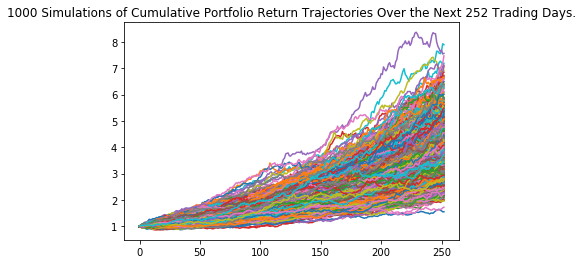

In [9]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

In [10]:
line_plot.get_figure().savefig("MC_oneyear_sim_plot.png", bbox_inches="tight")

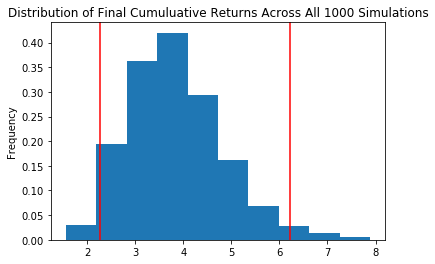

In [11]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [12]:
dist_plot.get_figure().savefig('MC_oneyear_dist_plot.png',bbox_inches='tight')

In [13]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               3.847814
std                0.985358
min                1.554589
25%                3.121421
50%                3.772610
75%                4.420587
max                7.888638
95% CI Lower       2.266829
95% CI Upper       6.223632
Name: 252, dtype: float64


In [14]:
#Calculate the possible future ranges of your portfolio for the next five years based on the initial investment of $200,000
even_ci_lower = round(even_tbl[8]*200000,2)
even_ci_upper = round(even_tbl[9]*200000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $200,000 in the portfolio"
      f" over the next year will end within the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $200,000 in the portfolio over the next year will end within the range of $453365.89 and $1244726.47.


### Simulate one year portfolio growth with optimal portfolio-distributed stock investments

In [15]:
# Configure a Monte Carlo simulation to forecast one year of cumulative returns for your optimal portfolio
MC_even_dist2 = MCSimulation(
    portfolio_data = investment_portfolio,
    weights = [.075, .05, .075, .05, .2, .2, .1, .05, .025, .025, .05, .1],
    num_simulation = 1000,
    num_trading_days = 252*1
)

# Print the simulation input data
MC_even_dist2.portfolio_data.head()

BA                  DAL                MGM               \
             close daily_return   close daily_return close daily_return   
Date                                                                      
2020-03-17  124.03          NaN  31.740          NaN  9.54          NaN   
2020-03-18  101.89    -0.178505  23.485    -0.260082  7.14    -0.251572   
2020-03-19   97.71    -0.041025  21.500    -0.084522  7.70     0.078431   
2020-03-20   95.01    -0.027633  21.350    -0.006977  9.11     0.183117   
2020-03-23  105.49     0.110304  22.230     0.041218  9.15     0.004391   

             WYNN                 Tesla               ...     AMZN  \
            close daily_return    close daily_return  ...    close   
Date                                                  ...            
2020-03-17  54.34          NaN  430.000          NaN  ...  1807.38   
2020-03-18  43.02    -0.208318  361.600    -0.159070  ...  1832.39   
2020-03-19  46.57     0.082520  427.295     0.181679  ...  1880.50   
2020-03-20  51.97     0.115954  427.530     0.000550  ...  1846.09   
2020-03-23  57.56     0.107562  434.290     0.015812  ...  1902.54   

                             BRK.A                 MSFT               \
           daily_return      close daily_return   close daily_return   
Date                                                                   
2020-03-17          NaN  280619.12          NaN  146.57          NaN   
2020-03-18     0.013838  258927.00    -0.077301  142.13    -0.030293   
2020-03-19     0.026255  261690.00     0.010671  142.67     0.003799   
2020-03-20    -0.018298  254600.00    -0.027093  136.77    -0.041354   
2020-03-23     0.030578  242000.00    -0.049489  135.56    -0.008847   

                    BTC                      ETH               
                  close daily_return       close daily_return  
Date                                                           
2020-03-17  5225.629395          NaN  113.942749          NaN  
2020-03-18  5238.438477     0.002451  114.842270     0.007894  
2020-03-19  6191.192871     0.181878  136.593857     0.189404  
2020-03-20  6198.778320     0.001225  132.737167    -0.028235  
2020-03-23  6416.314941     0.035093  134.911606     0.016382  

[5 rows x 24 columns]

In [16]:
# Run a Monte Carlo simulation to forecast one year of optimal cumulative returns
MC_even_dist2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.031545,1.073918,0.919128,0.968887,0.988845,1.053022,1.004603,0.953161,1.004762,1.065661,...,0.999226,0.975622,1.029925,0.998771,1.027794,1.002726,1.048823,1.039683,1.078787,0.935191
2,1.029851,1.053190,0.977067,0.919794,1.059719,1.065247,0.974811,0.916636,1.025464,1.037108,...,0.999156,0.927479,1.145949,0.985919,1.021187,1.041390,1.083692,1.018032,1.090301,0.991934
3,1.041962,1.150056,0.975360,0.888558,1.037270,1.085152,0.997195,0.869767,0.954324,1.039273,...,0.951817,0.895193,1.161287,0.962145,1.072782,1.082575,1.013748,1.077149,1.050180,0.899740
4,1.050536,1.122162,0.948781,0.866617,0.964753,1.080768,1.061676,0.905736,0.990391,1.089779,...,0.962454,0.918113,1.101304,0.941205,1.090708,1.145345,1.087389,1.033429,1.052938,0.877361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,31.832627,7.895321,3.254547,3.692085,12.943398,9.923989,4.826461,9.343209,9.830327,3.450334,...,5.191903,19.373277,10.217554,8.241940,3.621459,15.504395,8.681608,11.815504,17.340142,6.483314
249,30.324762,8.059450,3.411525,3.627483,12.626327,9.916029,4.945116,9.523301,10.226852,3.539010,...,4.922372,19.698482,10.426921,8.137972,3.707820,15.633053,9.041813,11.394182,17.510116,6.490692
250,33.100765,7.717913,3.575800,3.701663,13.287357,10.192957,4.874738,9.444376,10.390447,3.680616,...,4.839617,20.244772,10.363487,7.670173,3.664813,16.394994,10.163421,11.364581,18.356137,6.777239
251,31.581946,7.539473,3.541212,3.686958,13.762984,9.985453,4.695670,8.953272,10.528781,3.688595,...,4.873140,20.894378,9.949747,8.167052,3.763466,16.937776,10.464437,11.941310,17.784723,6.789753


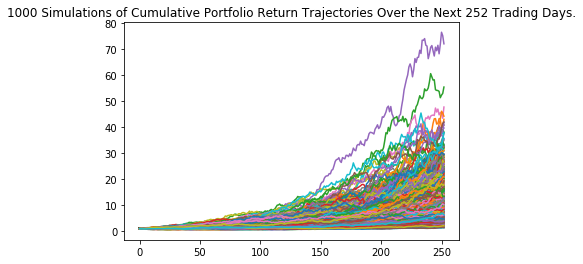

In [17]:
# Plot simulation outcomes
line_plot2 = MC_even_dist2.plot_simulation()

In [18]:
line_plot2.get_figure().savefig("MC_oneyear_optimal_sim_plot.png", bbox_inches="tight")

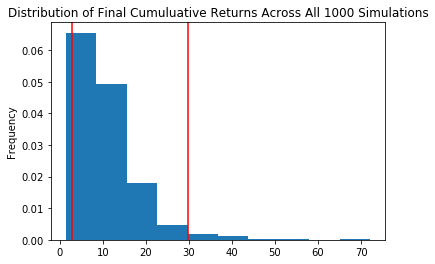

In [19]:
# Plot probability distribution and confidence intervals
dist_plot2 = MC_even_dist2.plot_distribution()

In [20]:
dist_plot2.get_figure().savefig('MC_oneyear_dist_optimal_plot.png',bbox_inches='tight')

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl2 = MC_even_dist2.summarize_cumulative_return()

# Print summary statistics
print(even_tbl2)

count           1000.000000
mean              10.763518
std                7.303316
min                1.409736
25%                5.769411
50%                8.990855
75%               13.566855
max               72.109675
95% CI Lower       2.768886
95% CI Upper      29.805195
Name: 252, dtype: float64


In [22]:
#Calculate the possible future ranges of your portfolio for the next five years based on the initial investment of $200,000
even_ci_lower2 = round(even_tbl2[8]*200000,2)
even_ci_upper2 = round(even_tbl2[9]*200000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $200,000 in the portfolio"
      f" over the next year will end within the range of"
      f" ${even_ci_lower2} and ${even_ci_upper2}.")

There is a 95% chance that an initial investment of $200,000 in the portfolio over the next year will end within the range of $553777.16 and $5961039.05.


### Simulate two years of portfolio growth with original portfolio-distributed stock investments

In [23]:
# Configure a Monte Carlo simulation to forecast two years of cumulative returns for your portfolio
MC_even_dist3 = MCSimulation(
    portfolio_data = investment_portfolio,
    weights = [.0625, .0625, .0625, .0625, .0625, .0625, .125, .125, .125, .125, .0625, .0625],
    num_simulation = 1000,
    num_trading_days = 252*2
)

# Print the simulation input data
MC_even_dist3.portfolio_data.head()

BA                  DAL                MGM               \
             close daily_return   close daily_return close daily_return   
Date                                                                      
2020-03-17  124.03          NaN  31.740          NaN  9.54          NaN   
2020-03-18  101.89    -0.178505  23.485    -0.260082  7.14    -0.251572   
2020-03-19   97.71    -0.041025  21.500    -0.084522  7.70     0.078431   
2020-03-20   95.01    -0.027633  21.350    -0.006977  9.11     0.183117   
2020-03-23  105.49     0.110304  22.230     0.041218  9.15     0.004391   

             WYNN                 Tesla               ...     AMZN  \
            close daily_return    close daily_return  ...    close   
Date                                                  ...            
2020-03-17  54.34          NaN  430.000          NaN  ...  1807.38   
2020-03-18  43.02    -0.208318  361.600    -0.159070  ...  1832.39   
2020-03-19  46.57     0.082520  427.295     0.181679  ...  1880.50   
2020-03-20  51.97     0.115954  427.530     0.000550  ...  1846.09   
2020-03-23  57.56     0.107562  434.290     0.015812  ...  1902.54   

                             BRK.A                 MSFT               \
           daily_return      close daily_return   close daily_return   
Date                                                                   
2020-03-17          NaN  280619.12          NaN  146.57          NaN   
2020-03-18     0.013838  258927.00    -0.077301  142.13    -0.030293   
2020-03-19     0.026255  261690.00     0.010671  142.67     0.003799   
2020-03-20    -0.018298  254600.00    -0.027093  136.77    -0.041354   
2020-03-23     0.030578  242000.00    -0.049489  135.56    -0.008847   

                    BTC                      ETH               
                  close daily_return       close daily_return  
Date                                                           
2020-03-17  5225.629395          NaN  113.942749          NaN  
2020-03-18  5238.438477     0.002451  114.842270     0.007894  
2020-03-19  6191.192871     0.181878  136.593857     0.189404  
2020-03-20  6198.778320     0.001225  132.737167    -0.028235  
2020-03-23  6416.314941     0.035093  134.911606     0.016382  

[5 rows x 24 columns]

In [24]:
# Run a Monte Carlo simulation to forecast two years of cumulative returns
MC_even_dist3.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012379,1.024061,1.037050,1.015935,1.009537,1.044903,1.014057,1.021143,1.010989,1.023758,...,1.018823,0.993012,1.002166,1.018086,1.027861,0.984456,1.003111,1.014992,0.984326,0.998704
2,1.016645,1.059994,1.036951,1.044711,1.011830,1.053026,1.003794,1.012073,1.003122,1.016908,...,1.010594,1.028795,1.018002,1.009972,1.014320,1.007428,1.013284,1.033321,0.995028,0.991626
3,1.035191,1.050959,1.037023,1.028247,1.053426,1.036843,0.995796,1.018960,1.029675,1.013669,...,0.988473,1.065712,1.030278,1.038828,1.008202,0.995608,1.021841,1.039092,0.988839,0.982152
4,1.039649,1.035076,1.051355,1.035253,1.048650,1.058462,0.994172,1.034916,1.031659,1.028080,...,0.995479,1.076179,1.037917,1.062294,1.019955,0.989400,1.035121,1.051595,0.987856,0.993112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,11.964671,14.614522,10.643912,22.113210,20.728463,9.798469,12.911941,14.763475,12.410025,10.591795,...,9.446340,13.204095,13.704947,12.732521,27.189507,7.932260,10.796702,10.256465,8.224817,12.266170
501,12.144545,14.709965,10.601883,22.564225,20.666458,9.669598,12.837295,14.669249,12.653164,10.705346,...,9.489050,13.276919,13.466415,12.813619,27.788409,8.151132,10.883542,10.550991,8.453014,12.519780
502,12.412532,14.984751,10.535676,22.679206,21.010256,9.803500,13.199926,14.837641,12.817772,10.936942,...,9.416973,12.968261,13.299024,12.919427,27.975106,8.435627,11.178563,10.546016,8.594807,12.468186
503,12.573723,15.149811,10.651869,23.084865,21.354846,9.563590,12.848368,14.794569,12.703201,10.747289,...,9.402351,12.909050,13.645882,13.181947,28.204871,8.142858,11.285159,10.505738,8.666832,12.319189


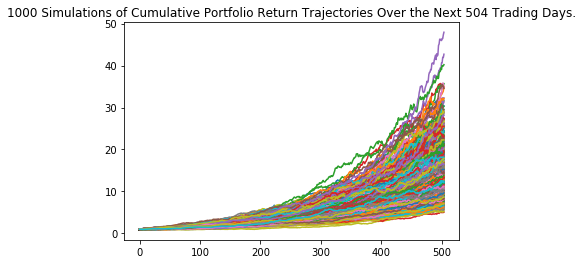

In [25]:
# Plot simulation outcomes
line_plot3 = MC_even_dist3.plot_simulation()

In [26]:
line_plot3.get_figure().savefig("MC_twoyear_sim_plot.png", bbox_inches="tight")

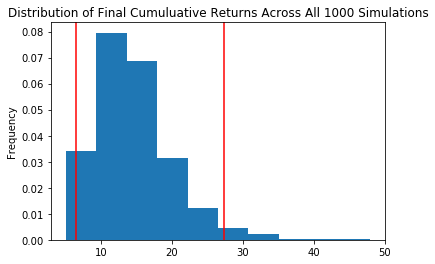

In [27]:
# Plot probability distribution and confidence intervals
dist_plot3 = MC_even_dist3.plot_distribution()

In [28]:
dist_plot3.get_figure().savefig('MC_oneyear_dist_plot.png',bbox_inches='tight')

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl3 = MC_even_dist3.summarize_cumulative_return()

# Print summary statistics
print(even_tbl3)

count           1000.000000
mean              14.603463
std                5.445873
min                5.067247
25%               10.594267
50%               13.788185
75%               17.335460
max               47.936900
95% CI Lower       6.509803
95% CI Upper      27.285360
Name: 504, dtype: float64


In [30]:
#Calculate the possible future ranges of your portfolio for the next two years based on the initial investment of $200,000
even_ci_lower3 = round(even_tbl3[8]*200000,2)
even_ci_upper3 = round(even_tbl3[9]*200000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $200,000 in the portfolio"
      f" over the next 2 years will end within the range of"
      f" ${even_ci_lower3} and ${even_ci_upper3}.")

There is a 95% chance that an initial investment of $200,000 in the portfolio over the next 2 years will end within the range of $1301960.54 and $5457071.94.


### Simulate two years of portfolio growth with optimal portfolio-distributed stock investments

In [31]:
# Configure a Monte Carlo simulation to forecast two years of cumulative returns for your optimal portfolio
MC_even_dist4 = MCSimulation(
    portfolio_data = investment_portfolio,
    weights = [.075, .05, .075, .05, .2, .2, .1, .05, .025, .025, .05, .1],
    num_simulation = 1000,
    num_trading_days = 252*2
)

# Print the simulation input data
MC_even_dist4.portfolio_data.head()

BA                  DAL                MGM               \
             close daily_return   close daily_return close daily_return   
Date                                                                      
2020-03-17  124.03          NaN  31.740          NaN  9.54          NaN   
2020-03-18  101.89    -0.178505  23.485    -0.260082  7.14    -0.251572   
2020-03-19   97.71    -0.041025  21.500    -0.084522  7.70     0.078431   
2020-03-20   95.01    -0.027633  21.350    -0.006977  9.11     0.183117   
2020-03-23  105.49     0.110304  22.230     0.041218  9.15     0.004391   

             WYNN                 Tesla               ...     AMZN  \
            close daily_return    close daily_return  ...    close   
Date                                                  ...            
2020-03-17  54.34          NaN  430.000          NaN  ...  1807.38   
2020-03-18  43.02    -0.208318  361.600    -0.159070  ...  1832.39   
2020-03-19  46.57     0.082520  427.295     0.181679  ...  1880.50   
2020-03-20  51.97     0.115954  427.530     0.000550  ...  1846.09   
2020-03-23  57.56     0.107562  434.290     0.015812  ...  1902.54   

                             BRK.A                 MSFT               \
           daily_return      close daily_return   close daily_return   
Date                                                                   
2020-03-17          NaN  280619.12          NaN  146.57          NaN   
2020-03-18     0.013838  258927.00    -0.077301  142.13    -0.030293   
2020-03-19     0.026255  261690.00     0.010671  142.67     0.003799   
2020-03-20    -0.018298  254600.00    -0.027093  136.77    -0.041354   
2020-03-23     0.030578  242000.00    -0.049489  135.56    -0.008847   

                    BTC                      ETH               
                  close daily_return       close daily_return  
Date                                                           
2020-03-17  5225.629395          NaN  113.942749          NaN  
2020-03-18  5238.438477     0.002451  114.842270     0.007894  
2020-03-19  6191.192871     0.181878  136.593857     0.189404  
2020-03-20  6198.778320     0.001225  132.737167    -0.028235  
2020-03-23  6416.314941     0.035093  134.911606     0.016382  

[5 rows x 24 columns]

In [32]:
# Run a Monte Carlo simulation to forecast two years of optimal cumulative returns
MC_even_dist4.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.028621,0.971044,1.073882,1.014858,1.027734,0.977746,0.982731,0.993660,0.963478,0.983495,...,1.006208,1.008832,1.040497,1.025590,1.105791,1.001095,1.058296,1.032513,1.058216,1.096709
2,1.043159,0.967897,1.115152,1.107801,1.054391,0.965045,0.974287,0.924678,1.007444,0.968078,...,1.065183,1.039957,1.088616,1.094111,1.091578,1.007814,0.986650,1.018782,1.043535,1.098167
3,1.133457,1.039057,1.066337,1.094416,1.099973,0.928914,0.968008,0.901929,0.955973,1.051211,...,1.146544,1.008919,1.043168,1.217884,1.176840,1.106531,0.982353,1.137905,1.058406,1.181971
4,1.063203,1.077973,1.069371,1.125597,1.151725,0.927681,0.896132,0.844928,1.016314,1.020756,...,1.216418,1.054566,1.098852,1.249695,1.209191,1.077929,0.951894,1.167068,1.101945,1.214277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,8.546411,8.989067,91.150722,295.135416,134.092961,97.135596,57.627384,61.738602,40.959112,207.449645,...,13.688004,31.469562,38.857403,70.281389,70.850054,243.353483,148.267741,49.097141,101.040885,269.095170
501,8.387037,9.115183,92.150730,296.028587,139.752061,102.566944,57.151233,57.862318,41.387725,197.587119,...,13.973195,31.451695,38.106636,70.876670,73.300020,237.103151,145.531410,49.249638,102.277087,283.218656
502,8.626034,9.241797,95.178975,294.430441,139.361309,102.950590,57.715851,56.304865,41.806301,207.120655,...,15.215136,31.554451,36.862063,69.506286,75.006810,244.347519,139.672497,47.557537,101.395758,291.768580
503,8.552225,9.077604,101.057556,291.260396,139.187512,97.968976,61.903747,56.516221,43.728362,197.893959,...,15.446023,31.346567,35.381717,78.957682,73.722710,243.573663,132.531782,50.709637,101.581704,303.154293


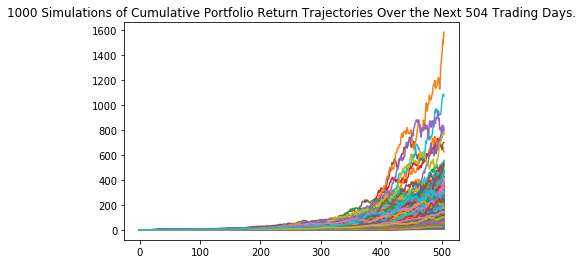

In [33]:
# Plot simulation outcomes
line_plot4 = MC_even_dist4.plot_simulation()

In [34]:
line_plot4.get_figure().savefig("MC_twoyear_optimal_sim_plot.png", bbox_inches="tight")

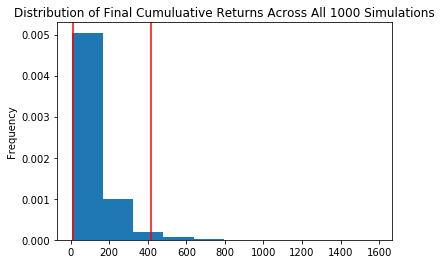

In [35]:
# Plot probability distribution and confidence intervals
dist_plot4 = MC_even_dist4.plot_distribution()

In [36]:
dist_plot4.get_figure().savefig('MC_twoyear_dist_optimal_plot.png',bbox_inches='tight')

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl4 = MC_even_dist4.summarize_cumulative_return()

# Print summary statistics
print(even_tbl4)

count           1000.000000
mean             115.574916
std              119.753424
min                8.159051
25%               47.170578
50%               79.462858
75%              140.456327
max             1585.977852
95% CI Lower      13.647887
95% CI Upper     416.214305
Name: 504, dtype: float64


In [38]:
#Calculate the possible future ranges of your portfolio for the next five years based on the initial investment of $200,000
even_ci_lower4 = round(even_tbl4[8]*200000,2)
even_ci_upper4 = round(even_tbl4[9]*200000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $200,000 in the portfolio"
      f" over the next 2 years will end within the range of"
      f" ${even_ci_lower4} and ${even_ci_upper4}.")

There is a 95% chance that an initial investment of $200,000 in the portfolio over the next 2 years will end within the range of $2729577.4 and $83242860.91.


## Forecasting Summary